In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
data = fetch_california_housing(as_frame=True)
housing = data.frame

# Display dataset information
print(housing.info())
print(housing.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

In [2]:
import numpy as np

# Apply log transformation to skewed features
housing['MedInc_log'] = np.log1p(housing['MedInc'])
housing['MedHouseVal_log'] = np.log1p(housing['MedHouseVal'])

# Check transformation results
print(housing[['MedInc', 'MedInc_log']].head())


   MedInc  MedInc_log
0  8.3252    2.232720
1  8.3014    2.230165
2  7.2574    2.111110
3  5.6431    1.893579
4  3.8462    1.578195


In [3]:
from sklearn.preprocessing import StandardScaler

# Standardize continuous features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(housing[['MedInc', 'AveRooms', 'HouseAge', 'Population', 'Latitude', 'Longitude']])
scaled_df = pd.DataFrame(scaled_features, columns=['MedInc_scaled', 'AveRooms_scaled', 'HouseAge_scaled', 'Population_scaled', 'Latitude_scaled', 'Longitude_scaled'])

print(scaled_df.head())


   MedInc_scaled  AveRooms_scaled  HouseAge_scaled  Population_scaled  \
0       2.344766         0.628559         0.982143          -0.974429   
1       2.332238         0.327041        -0.607019           0.861439   
2       1.782699         1.155620         1.856182          -0.820777   
3       0.932968         0.156966         1.856182          -0.766028   
4      -0.012881         0.344711         1.856182          -0.759847   

   Latitude_scaled  Longitude_scaled  
0         1.052548         -1.327835  
1         1.043185         -1.322844  
2         1.038503         -1.332827  
3         1.038503         -1.337818  
4         1.038503         -1.337818  


In [4]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features for Latitude and Longitude
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(housing[['Latitude', 'Longitude']])

# Create a dataframe with the new polynomial features
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['Latitude', 'Longitude']))
print(poly_df.head())


   Latitude  Longitude  Latitude^2  Latitude Longitude  Longitude^2
0     37.88    -122.23   1434.8944          -4630.0724   14940.1729
1     37.86    -122.22   1433.3796          -4627.2492   14937.7284
2     37.85    -122.24   1432.6225          -4626.7840   14942.6176
3     37.85    -122.25   1432.6225          -4627.1625   14945.0625
4     37.85    -122.25   1432.6225          -4627.1625   14945.0625


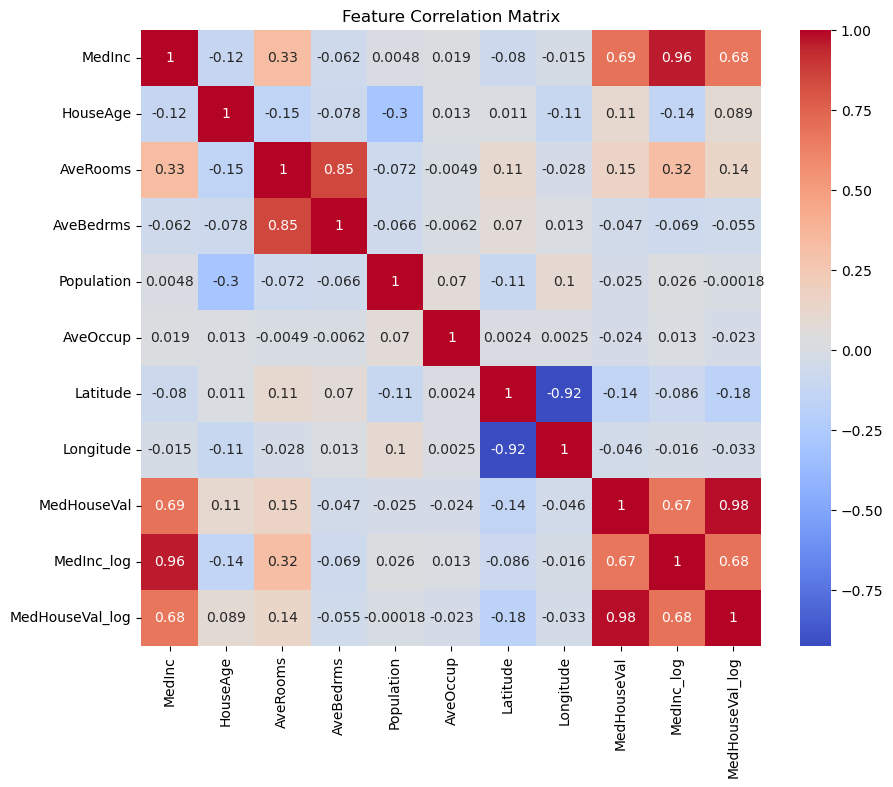

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = housing.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [6]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Select relevant features
X = housing[['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'Latitude', 'Longitude']]
y = housing['MedHouseVal']

# Apply RFE
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=3)
X_rfe = rfe.fit_transform(X, y)

# Display selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['MedInc', 'Latitude', 'Longitude'], dtype='object')


In [7]:
from sklearn.linear_model import LassoCV

# Apply Lasso regression with cross-validation
lasso = LassoCV(cv=5)
lasso.fit(X, y)

# Display non-zero coefficients
selected_features_lasso = X.columns[lasso.coef_ != 0]
print("Features selected by Lasso:", selected_features_lasso)


Features selected by Lasso: Index(['MedInc', 'Population', 'Latitude', 'Longitude'], dtype='object')


In [8]:
# Create interaction feature between Median Income and Average Rooms
housing['MedInc_AveRooms'] = housing['MedInc'] * housing['AveRooms']

print(housing[['MedInc', 'AveRooms', 'MedInc_AveRooms']].head())


   MedInc  AveRooms  MedInc_AveRooms
0  8.3252  6.984127        58.144254
1  8.3014  6.238137        51.785271
2  7.2574  8.288136        60.150315
3  5.6431  5.817352        32.827897
4  3.8462  6.281853        24.161264


In [9]:
from sklearn.decomposition import PCA

# Apply PCA on standardized features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

# Check explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.32916432 0.23911417]


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into train and test sets
X_baseline = housing[['MedInc', 'AveRooms', 'HouseAge', 'Population', 'Latitude', 'Longitude']]
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42)

# Fit baseline linear regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Evaluate the model
y_pred = baseline_model.predict(X_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Baseline RMSE:", baseline_rmse)


Baseline RMSE: 0.7406212106305607


In [11]:
# Combine engineered features
X_engineered = housing[['MedInc_log', 'AveRooms', 'HouseAge', 'MedInc_AveRooms', 'Latitude', 'Longitude']]

# Split data
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(X_engineered, y, test_size=0.2, random_state=42)

# Fit enhanced model
enhanced_model = LinearRegression()
enhanced_model.fit(X_train_eng, y_train_eng)

# Evaluate the model
y_pred_eng = enhanced_model.predict(X_test_eng)
enhanced_rmse = np.sqrt(mean_squared_error(y_test_eng, y_pred_eng))
print("Enhanced Model RMSE:", enhanced_rmse)


Enhanced Model RMSE: 0.7513707212677964


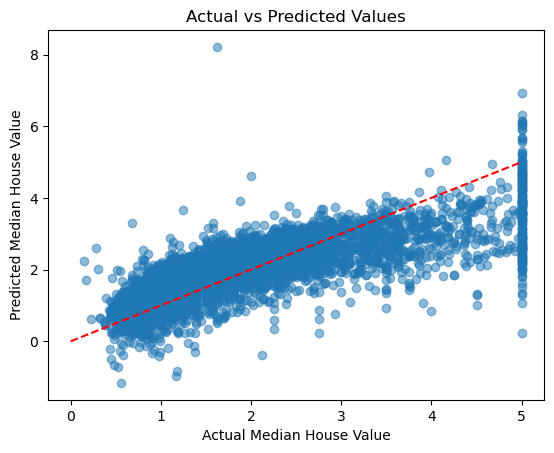

In [12]:
plt.scatter(y_test_eng, y_pred_eng, alpha=0.5)
plt.plot([0, 5], [0, 5], '--r')
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.show()


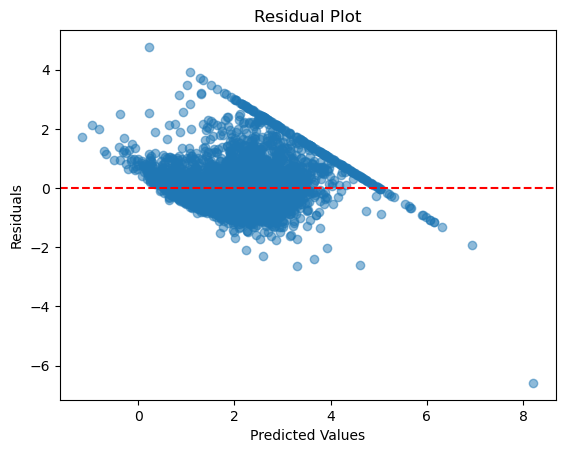

In [13]:
residuals = y_test_eng - y_pred_eng

plt.scatter(y_pred_eng, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features and target variable
X_baseline = housing[['MedInc', 'AveRooms', 'HouseAge', 'Population', 'Latitude', 'Longitude']]
y = housing['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42)

# Baseline linear regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_baseline = baseline_model.predict(X_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
baseline_r2 = r2_score(y_test, y_pred_baseline)

print(f"Baseline RMSE: ${baseline_rmse:.2f}")
print(f"Baseline R^2: {baseline_r2:.2f}")


Baseline RMSE: $0.74
Baseline R^2: 0.58


PCA RMSE: $1.08
PCA R^2: 0.11


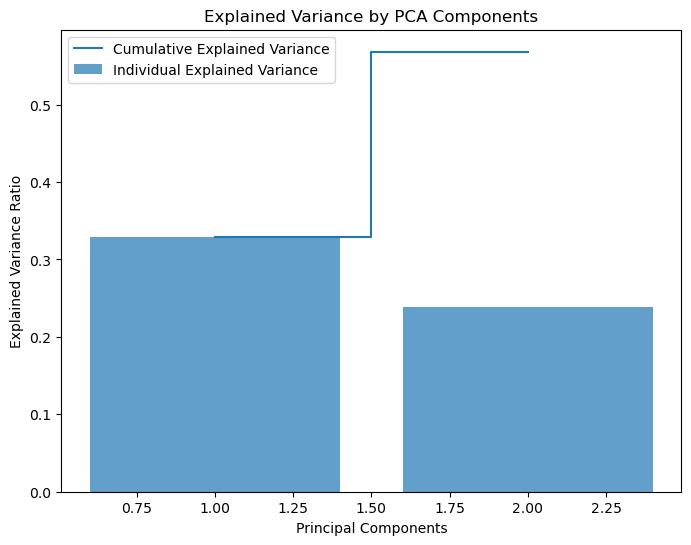

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_baseline)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test split for PCA-transformed data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Linear regression on PCA-transformed data
pca_model = LinearRegression()
pca_model.fit(X_train_pca, y_train_pca)

# Predictions and evaluation
y_pred_pca = pca_model.predict(X_test_pca)
pca_rmse = np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))
pca_r2 = r2_score(y_test_pca, y_pred_pca)

print(f"PCA RMSE: ${pca_rmse:.2f}")
print(f"PCA R^2: {pca_r2:.2f}")

# Visualize explained variance
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(range(1, 3), pca.explained_variance_ratio_, alpha=0.7, align='center', label='Individual Explained Variance')
plt.step(range(1, 3), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.title('Explained Variance by PCA Components')
plt.show()


In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV

# Recursive Feature Elimination (RFE)
rfe_model = LinearRegression()
rfe = RFE(estimator=rfe_model, n_features_to_select=3)
X_rfe = rfe.fit_transform(X_baseline, y)

# Train-test split for RFE-selected features
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Linear regression on RFE-selected features
rfe_model.fit(X_train_rfe, y_train_rfe)
y_pred_rfe = rfe_model.predict(X_test_rfe)

rfe_rmse = np.sqrt(mean_squared_error(y_test_rfe, y_pred_rfe))
rfe_r2 = r2_score(y_test_rfe, y_pred_rfe)

print(f"RFE + Lasso RMSE: ${rfe_rmse:.2f}")
print(f"RFE + Lasso R^2: {rfe_r2:.2f}")


RFE + Lasso RMSE: $0.75
RFE + Lasso R^2: 0.57


Polynomial Features RMSE: $0.71
Polynomial Features R^2: 0.61


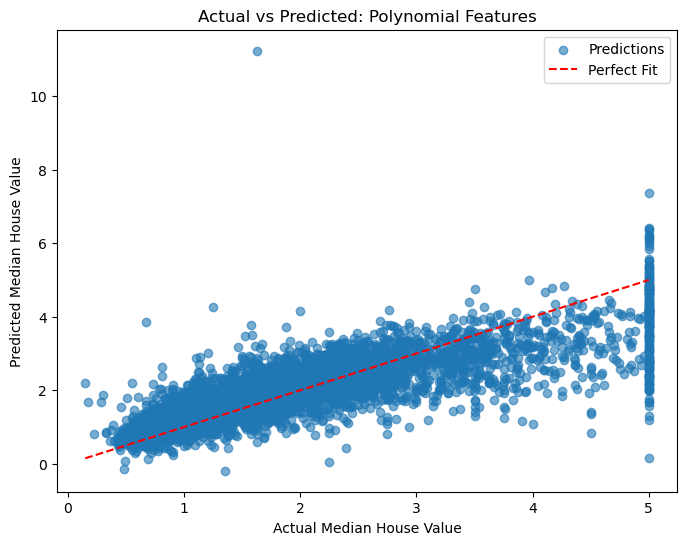

In [18]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_baseline)

# Train-test split for polynomial features
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Linear regression on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

# Predictions and evaluation
y_pred_poly = poly_model.predict(X_test_poly)
poly_rmse = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))
poly_r2 = r2_score(y_test_poly, y_pred_poly)

print(f"Polynomial Features RMSE: ${poly_rmse:.2f}")
print(f"Polynomial Features R^2: {poly_r2:.2f}")

# Visualize actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_poly, y_pred_poly, alpha=0.6, label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', label='Perfect Fit')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted: Polynomial Features')
plt.legend()
plt.show()


In [19]:
print("Model Performance Summary:")
print(f"Baseline: R^2 = {baseline_r2:.2f}, RMSE = ${baseline_rmse:.2f}")
print(f"PCA: R^2 = {pca_r2:.2f}, RMSE = ${pca_rmse:.2f}")
print(f"RFE + Lasso: R^2 = {rfe_r2:.2f}, RMSE = ${rfe_rmse:.2f}")
print(f"Polynomial Features: R^2 = {poly_r2:.2f}, RMSE = ${poly_rmse:.2f}")


Model Performance Summary:
Baseline: R^2 = 0.58, RMSE = $0.74
PCA: R^2 = 0.11, RMSE = $1.08
RFE + Lasso: R^2 = 0.57, RMSE = $0.75
Polynomial Features: R^2 = 0.61, RMSE = $0.71
